# 聚类

In [22]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_blobs,make_moons

In [24]:
n_samples=1000

In [25]:
circles=make_circles(n_samples=n_samples,factor=0.5,noise=0.05)
moons=make_moons(n_samples=n_samples,noise=0.05)
blobs=make_blobs(n_samples=n_samples,random_state=0)
random_data=np.random.rand(n_samples,2),None

In [26]:
circles

(array([[-0.40539286, -0.26236131],
        [ 0.41071523, -0.13367167],
        [ 0.84348973,  0.6416914 ],
        ...,
        [-0.15651035, -0.9103782 ],
        [-0.90351396,  0.46864319],
        [-0.27134433, -0.95175753]]),
 array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 1, 1, 

In [27]:
colors="bgrcmyk"
data=[circles,moons,blobs,random_data]
models=[("None",None)]
f=plt.figure()

<Figure size 432x288 with 0 Axes>

In [28]:
len(data)

4

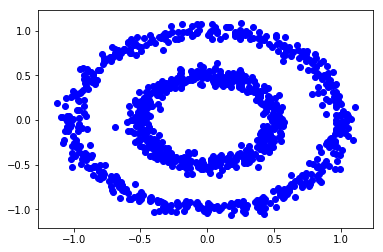

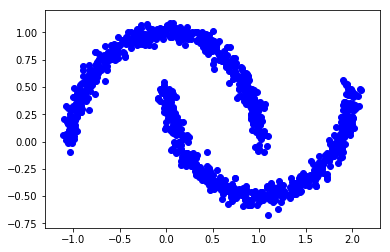

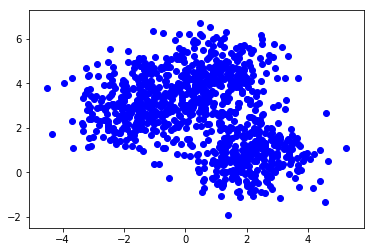

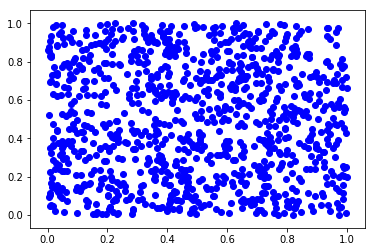

In [34]:
for inx,clt in enumerate(models):
    clt_name,clt_entity=clt
    for i,dataset in enumerate(data):
        X,Y=dataset
        if not clt_entity:
            clt_res=[0 for item in range(len(X))]
        f.add_subplot(len(models),len(data),inx*len(data)+i+1)
        [plt.scatter(X[p,0],X[p,1],color=colors[clt_res[p]]) for p in range(len(X))]
        plt.show()

Kmeans 0 0.3901112628969645
Kmeans 1 0.42695015854720936
Kmeans 2 0.8260921886020176
Kmeans 3 0.3886746483709406
DBSCAN 0 0.11249224826892676
DBSCAN 1 0.333209713453772
DBSCAN 2 0.8260921886020176
Agglomerative 0 0.349202422877515
Agglomerative 1 0.417846587950528
Agglomerative 2 0.8260921886020176
Agglomerative 3 0.2929102702122124


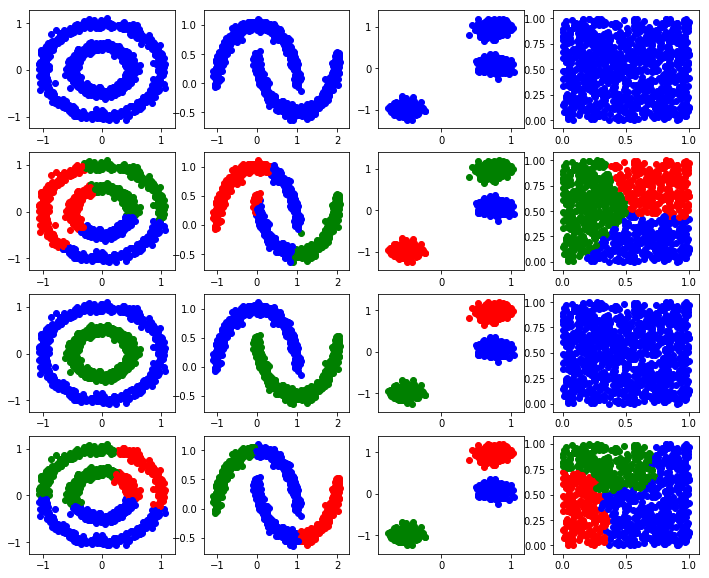

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_blobs,make_moons
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
n_samples=1000
circles=make_circles(n_samples=n_samples,factor=0.5,noise=0.05)
moons=make_moons(n_samples=n_samples,noise=0.05)
blobs=make_blobs(n_samples=n_samples,random_state=8,center_box=(-1,1),cluster_std=0.1)
random_data=np.random.rand(n_samples,2),None
colors="bgrcmyk"
data=[circles,moons,blobs,random_data]
models=[("None",None),("Kmeans",KMeans(n_clusters=3)),
        ("DBSCAN",DBSCAN(min_samples=3,eps=0.2)),
        ("Agglomerative",AgglomerativeClustering(n_clusters=3,linkage="ward"))]
from sklearn.metrics import silhouette_score
f=plt.figure(figsize=(12,10))
for inx,clt in enumerate(models):
    clt_name,clt_entity=clt
    for i,dataset in enumerate(data):
        X,Y=dataset
        if not clt_entity:
            clt_res=[0 for item in range(len(X))]
        else:
            clt_entity.fit(X)
            clt_res=clt_entity.labels_.astype(np.int)
        f.add_subplot(len(models),len(data),inx*len(data)+i+1)
        #plt.title(clt_name)
        try:
            print(clt_name,i,silhouette_score(X,clt_res))
        except:
            pass
        [plt.scatter(X[p,0],X[p,1],color=colors[clt_res[p]]) for p in range(len(X))]
plt.show()

# 6-19

## 关联规则